<a href="https://colab.research.google.com/github/sprashant19/Car-Customer-Segmentation/blob/main/customer_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [122]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.feature_selection import RFE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [123]:
df=pd.read_csv("/content/Train.csv")

In [124]:
df

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...,...
8063,464018,Male,No,22,No,NaN,0.0,Low,7.0,Cat_1,D
8064,464685,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D
8065,465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,D
8066,467299,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,B


**DATA CLEANING**

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


In [126]:
df.isna().sum()

ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

In [127]:
df1=df.dropna(subset=["Ever_Married","Graduated","Profession","Work_Experience","Family_Size","Var_1"])

In [128]:
df1

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
5,461319,Male,Yes,56,No,Artist,0.0,Average,2.0,Cat_6,C
6,460156,Male,No,32,Yes,Healthcare,1.0,Low,3.0,Cat_6,C
...,...,...,...,...,...,...,...,...,...,...,...
8062,463002,Male,Yes,41,Yes,Artist,0.0,High,5.0,Cat_6,B
8064,464685,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D
8065,465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,D
8066,467299,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,B


In [129]:
df1.isna().sum()

ID                 0
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
Segmentation       0
dtype: int64

In [130]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6665 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               6665 non-null   int64  
 1   Gender           6665 non-null   object 
 2   Ever_Married     6665 non-null   object 
 3   Age              6665 non-null   int64  
 4   Graduated        6665 non-null   object 
 5   Profession       6665 non-null   object 
 6   Work_Experience  6665 non-null   float64
 7   Spending_Score   6665 non-null   object 
 8   Family_Size      6665 non-null   float64
 9   Var_1            6665 non-null   object 
 10  Segmentation     6665 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 624.8+ KB


In [131]:
df1=df1.astype({'Work_Experience':'int64','Family_Size':'int64'})
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6665 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ID               6665 non-null   int64 
 1   Gender           6665 non-null   object
 2   Ever_Married     6665 non-null   object
 3   Age              6665 non-null   int64 
 4   Graduated        6665 non-null   object
 5   Profession       6665 non-null   object
 6   Work_Experience  6665 non-null   int64 
 7   Spending_Score   6665 non-null   object
 8   Family_Size      6665 non-null   int64 
 9   Var_1            6665 non-null   object
 10  Segmentation     6665 non-null   object
dtypes: int64(4), object(7)
memory usage: 624.8+ KB


In [132]:
df1

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1,Low,4,Cat_4,D
2,466315,Female,Yes,67,Yes,Engineer,1,Low,1,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0,High,2,Cat_6,B
5,461319,Male,Yes,56,No,Artist,0,Average,2,Cat_6,C
6,460156,Male,No,32,Yes,Healthcare,1,Low,3,Cat_6,C
...,...,...,...,...,...,...,...,...,...,...,...
8062,463002,Male,Yes,41,Yes,Artist,0,High,5,Cat_6,B
8064,464685,Male,No,35,No,Executive,3,Low,4,Cat_4,D
8065,465406,Female,No,33,Yes,Healthcare,1,Low,1,Cat_6,D
8066,467299,Female,No,27,Yes,Healthcare,1,Low,4,Cat_6,B


In [133]:
df2=df1.drop(columns=['ID'])

In [134]:
df2

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,Male,No,22,No,Healthcare,1,Low,4,Cat_4,D
2,Female,Yes,67,Yes,Engineer,1,Low,1,Cat_6,B
3,Male,Yes,67,Yes,Lawyer,0,High,2,Cat_6,B
5,Male,Yes,56,No,Artist,0,Average,2,Cat_6,C
6,Male,No,32,Yes,Healthcare,1,Low,3,Cat_6,C
...,...,...,...,...,...,...,...,...,...,...
8062,Male,Yes,41,Yes,Artist,0,High,5,Cat_6,B
8064,Male,No,35,No,Executive,3,Low,4,Cat_4,D
8065,Female,No,33,Yes,Healthcare,1,Low,1,Cat_6,D
8066,Female,No,27,Yes,Healthcare,1,Low,4,Cat_6,B


**DISTRIBUTION PLOT**

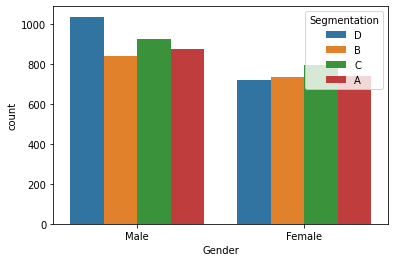

In [135]:
sns.countplot(x="Gender",hue="Segmentation",data=df2)
plt.show()

Interpretation:

1)Category "D" customers who are mostly men are more than 1000 and are the highest.And lowest Category is "B" of 800 counts.

2)For Female, Category "C" have bought the car more than other category people.And the lowest category who bought the car is "D" category.

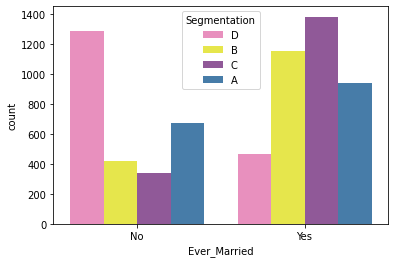

In [136]:
sns.countplot(x="Ever_Married",hue="Segmentation",palette="Set1_r",data=df2)
plt.show()

Interpretation:

1)Married customers in the Category of C are more than 1300 which is highest among the married customer.Also Category D people is the lowest in this category.

2)Unmarried cutomers in category D are more than 1200 which is the highest in this category.Also Category C people is the lowest in this category.

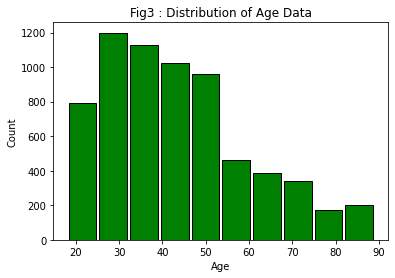

In [137]:
plt.hist(df2["Age"],color='green',edgecolor='black',rwidth=0.9)
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Fig3 : Distribution of Age Data")
plt.show()

Interpretation:

1)Customers in the age range of 25-35 have bought most number of cars.

2)Customers in the age range of 75-85 have bought the less number of cars.

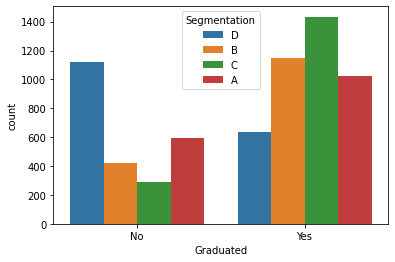

In [138]:
sns.countplot(x="Graduated",hue="Segmentation",data=df2)
plt.show()

Interpretation:

1)Category C cutomers are highest in Graduated customer.And category D customers are lowest in Graduated customer category.

2)Category D cutomers are highest in not graduated customer.And category D customers are lowest in not graduated customer category.

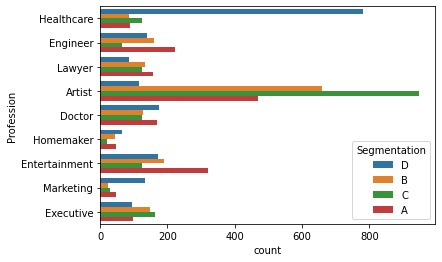

In [139]:
sns.countplot(y="Profession",hue="Segmentation",data=df2)
plt.show()

Interpretation:

1)Artist in Category C are the highest number of customer who bought the car.

2)Marketing professional in category B are the lowest number of customer who bought the car.

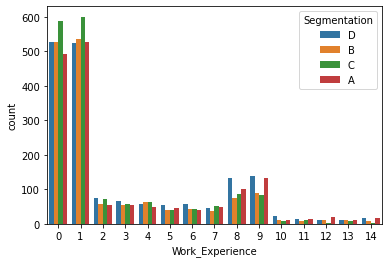

In [140]:
sns.countplot(x="Work_Experience",hue="Segmentation",data=df2)
plt.show()

Interpretation:

1)Customers with work experience of 1year in the category C are the highest number of cutomers who bought the car.

2)Customer with work experience of 14 year in the category B are the lowest number of customers who bought the car.

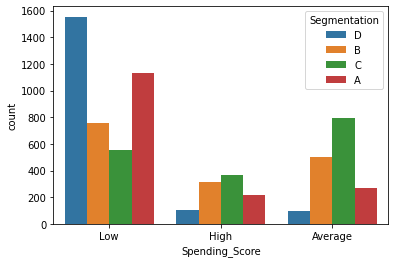

In [141]:
sns.countplot(x="Spending_Score",hue="Segmentation",data=df2)
plt.show()

Interpretation:

1)Cutomers whose spending score is low and in the category D are the ones who bought car the highest based on Spending Score.

2)Cutomers whose spending score is high and in the category C are the ones who bought car the highest based on Spending Score.

3)Cutomers whose spending score is Average and in the category D are the ones who bought car the highest based on Spending Score.

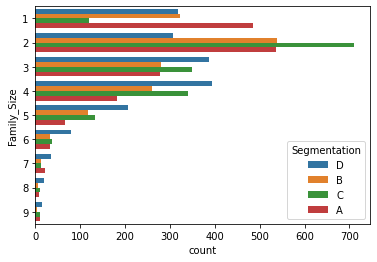

In [142]:
sns.countplot(y="Family_Size",hue="Segmentation",data=df2)
plt.show()

Interpretation:

1)Family size of 2 has highest number of cars bought in Category C.

2)Family size of 9 has lowest number of cars bought in category B.

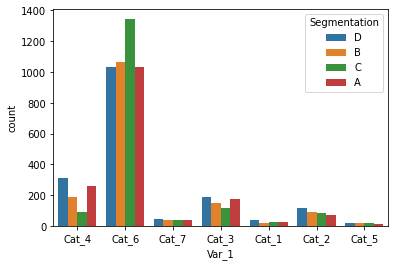

In [143]:
sns.countplot(x="Var_1",hue="Segmentation",data=df2)
plt.show()

Interpretation:

1)Cat_6 customers in category C are the highest number of customers  who bought cars.

2)Cat_5 customers in category A are the lowest number of customers  who bought cars.

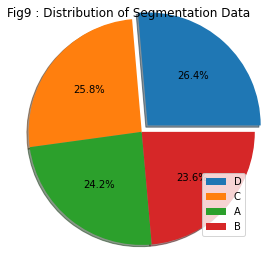

In [144]:
x=df2['Segmentation'].value_counts()
y=["D","C","A","B"]
plt.pie(x,explode=(0.1,0,0,0),shadow=True,autopct="%.1f%%",radius=1.3)
plt.legend(labels=y,loc='lower right')
plt.title("Fig9 : Distribution of Segmentation Data",loc='right')
plt.show()

**DATA ENCODING**

In [145]:

label_encoder=preprocessing.LabelEncoder()
df2["Gender"]=label_encoder.fit_transform(df2["Gender"])
df2["Ever_Married"]=label_encoder.fit_transform(df2["Ever_Married"])
df2["Graduated"]=label_encoder.fit_transform(df2["Graduated"])
df2["Spending_Score"]=label_encoder.fit_transform(df2["Spending_Score"])
df2["Var_1"]=label_encoder.fit_transform(df2["Var_1"])
df2["Segmentation"]=label_encoder.fit_transform(df2["Segmentation"])

In [146]:
df3=pd.get_dummies(df2,columns=["Profession"])
df3

,Gender,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,Profession_Artist,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing
0,1,0,22,0,1,2,4,3,3,0,0,0,0,0,1,0,0,0
2,0,1,67,1,1,2,1,5,1,0,0,1,0,0,0,0,0,0
3,1,1,67,1,0,1,2,5,1,0,0,0,0,0,0,0,1,0
5,1,1,56,0,0,0,2,5,2,1,0,0,0,0,0,0,0,0
6,1,0,32,1,1,2,3,5,2,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8062,1,1,41,1,0,1,5,5,1,1,0,0,0,0,0,0,0,0
8064,1,0,35,0,3,2,4,3,3,0,0,0,0,1,0,0,0,0
8065,0,0,33,1,1,2,1,5,3,0,0,0,0,0,1,0,0,0
8066,0,0,27,1,1,2,4,5,1,0,0,0,0,0,1,0,0,0


In [147]:
x=df3[["Gender","Ever_Married","Age","Graduated","Work_Experience","Spending_Score","Family_Size","Var_1","Profession_Artist","Profession_Doctor","Profession_Engineer","Profession_Entertainment","Profession_Executive","Profession_Healthcare","Profession_Homemaker","Profession_Lawyer","Profession_Marketing"]].values
y=df3["Segmentation"].values

**DATA SPLITTING**

In [148]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

**DATA SCALING**

In [149]:
scaler=StandardScaler()
scaler.fit(x_train,y_train)
x_train_scaled=scaler.transform(x_train)
x_test_scaled=scaler.transform(x_test)

**LOGISTIC REGRESSION MODEL**

In [150]:
log_reg = LogisticRegression()
log_reg.fit(x_train_scaled,y_train)

LogisticRegression()

In [151]:
log_reg.predict(x_test_scaled)

array([2, 0, 2, ..., 3, 2, 3])

In [152]:
df_pred=pd.DataFrame({'Actual':y_test,'Predicted':log_reg.predict(x_test_scaled)})
df_pred

,Actual,Predicted
0,2,2
1,0,0
2,2,2
3,2,3
4,2,2
...,...,...
1328,0,2
1329,2,2
1330,3,3
1331,2,2


In [153]:
y_test_prediction=log_reg.predict(x_test_scaled)
y_test_prediction

array([2, 0, 2, ..., 3, 2, 3])

In [154]:
roc_auc_score(y_test,log_reg.predict_proba(x_test_scaled),multi_class='ovo')

0.7467010282680203

**K-NEAREST NEIGHBOR MODEL**

In [156]:
kn_clf=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
kn_clf.fit(x_train_scaled,y_train)

KNeighborsClassifier()

In [157]:
y_pred_kn=kn_clf.predict(x_test_scaled)
y_pred_kn

array([2, 1, 1, ..., 2, 2, 3])

In [158]:
df_kn=pd.DataFrame({"Actual":y_test,"Predicted":y_pred_kn})
df_kn

,Actual,Predicted
0,2,2
1,0,1
2,2,1
3,2,3
4,2,2
...,...,...
1328,0,3
1329,2,1
1330,3,2
1331,2,2


In [159]:
kn_proba=kn_clf.predict_proba(x_test_scaled)

In [160]:
roc_auc_score(y_test,kn_proba,multi_class='ovo')

0.7089170220353429

**NAIVE BAYES MODEL**

In [162]:
classifier=GaussianNB()
classifier.fit(x_train_scaled,y_train)

GaussianNB()

In [163]:
y_pred=classifier.predict(x_test_scaled)
y_pred

array([2, 2, 2, ..., 1, 2, 3])

In [164]:
y_predproba=classifier.predict_proba(x_test_scaled)
y_predproba

array([[2.03201039e-03, 1.99837050e-01, 7.98086821e-01, 4.41185612e-05],
       [1.60370935e-01, 2.71920693e-01, 5.67380862e-01, 3.27509454e-04],
       [3.36910471e-03, 2.35805509e-01, 7.60723730e-01, 1.01656169e-04],
       ...,
       [7.73649000e-02, 4.82754994e-01, 3.46775238e-01, 9.31048679e-02],
       [2.29499767e-02, 1.55005035e-01, 8.22041857e-01, 3.13169785e-06],
       [1.49420858e-04, 3.29535142e-05, 2.21921000e-04, 9.99595705e-01]])

In [165]:
dnb=pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
dnb

,Actual,Predicted
0,2,2
1,0,2
2,2,2
3,2,3
4,2,2
...,...,...
1328,0,1
1329,2,2
1330,3,1
1331,2,2


In [166]:
auroc=roc_auc_score(y_test,y_predproba,multi_class='ovo')
auroc

0.725978128837743

**DECISION TREE MODEL**

In [168]:
dt=DecisionTreeClassifier(max_depth=2)
dt.fit(x_train_scaled,y_train)

DecisionTreeClassifier(max_depth=2)

In [169]:
y_preddt=dt.predict(x_test_scaled)
y_preddt

array([2, 0, 2, ..., 3, 0, 3])

In [170]:
dtproba=dt.predict_proba(x_test_scaled)
dtproba

array([[0.1611399 , 0.31761658, 0.47253886, 0.04870466],
       [0.38587949, 0.27936701, 0.14729154, 0.18746196],
       [0.1611399 , 0.31761658, 0.47253886, 0.04870466],
       ...,
       [0.27279937, 0.12926249, 0.14512292, 0.45281523],
       [0.38587949, 0.27936701, 0.14729154, 0.18746196],
       [0.27279937, 0.12926249, 0.14512292, 0.45281523]])

In [171]:
roc_auc_score(y_test,dt.predict_proba(x_test_scaled),multi_class='ovo')

0.6931612099434409

[Text(0.5, 0.8333333333333334, 'X[2] <= -0.567\ngini = 0.749\nsamples = 5332\nvalue = [1307, 1253, 1358, 1414]'),
 Text(0.25, 0.5, 'X[2] <= -1.177\ngini = 0.603\nsamples = 1759\nvalue = [362, 181, 204, 1012]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.211\nsamples = 498\nvalue = [18, 18, 21, 441]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.683\nsamples = 1261\nvalue = [344, 163, 183, 571]'),
 Text(0.75, 0.5, 'X[5] <= 0.176\ngini = 0.723\nsamples = 3573\nvalue = [945, 1072, 1154, 402]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.647\nsamples = 1930\nvalue = [311, 613, 912, 94]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.716\nsamples = 1643\nvalue = [634, 459, 242, 308]')]

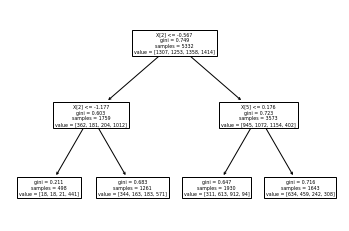

In [172]:
tree.plot_tree(dt)

**RANDOM FOREST MODEL**

In [174]:
rf=RandomForestClassifier(n_estimators=10,max_depth=2,max_features='sqrt')
rf.fit(x_train_scaled,y_train)

RandomForestClassifier(max_depth=2, max_features='sqrt', n_estimators=10)

In [175]:
y_predrf=rf.predict(x_test_scaled)
y_predrf

array([2, 0, 2, ..., 3, 0, 3])

In [176]:
dfrf=pd.DataFrame({"Actual":y_test,"Predicted":y_predrf})
dfrf

,Actual,Predicted
0,2,2
1,0,0
2,2,2
3,2,3
4,2,2
...,...,...
1328,0,2
1329,2,2
1330,3,3
1331,2,0


In [177]:
rfproba=rf.predict_proba(x_test_scaled)
rfproba

array([[0.22775916, 0.29076419, 0.35778751, 0.12368914],
       [0.34108932, 0.26401133, 0.19666793, 0.19823142],
       [0.22775916, 0.29076419, 0.35778751, 0.12368914],
       ...,
       [0.30260611, 0.19773123, 0.18496866, 0.314694  ],
       [0.30155022, 0.2729944 , 0.26033255, 0.16512282],
       [0.17079955, 0.12929044, 0.13531131, 0.5645987 ]])

In [178]:
roc_auc_score(y_test,rf.predict_proba(x_test_scaled),multi_class='ovr')

0.7399593774636773

**GRADIENT BOOSTING MODEL**

In [180]:
lr=[0.01,0.02,0.03,0.05,0.07,0.075,0.25,0.50,0.75,1]
for learning_rate in lr:
  gb_clf=GradientBoostingClassifier(n_estimators=100,learning_rate=learning_rate)
  gb_clf.fit(x_train_scaled,y_train)
  

In [181]:
y_predgb=gb_clf.predict(x_test_scaled)
y_predgb

array([2, 1, 1, ..., 3, 2, 3])

In [182]:
dfgb=pd.DataFrame({"Actual":y_test,"Predicted":y_predgb})
dfgb

,Actual,Predicted
0,2,2
1,0,1
2,2,1
3,2,3
4,2,2
...,...,...
1328,0,0
1329,2,1
1330,3,3
1331,2,2


In [183]:
gbproba=gb_clf.predict_proba(x_test_scaled)
gbproba

array([[0.04016978, 0.14832158, 0.80177508, 0.00973355],
       [0.23363939, 0.5357487 , 0.1575084 , 0.0731035 ],
       [0.37908571, 0.40596859, 0.19428116, 0.02066454],
       ...,
       [0.03836905, 0.00247341, 0.01488979, 0.94426775],
       [0.03693789, 0.11772034, 0.84257748, 0.00276429],
       [0.30367514, 0.05852303, 0.16481082, 0.47299101]])

In [184]:
roc_auc_score(y_test,gbproba,multi_class='ovr')

0.7446000968142075

**XG BOOST MODEL**

In [186]:
xgb_clf=XGBClassifier(learning_rate=0.05,verbosity=0)
xgb_clf.fit(x_train_scaled,y_train)

XGBClassifier(learning_rate=0.05, objective='multi:softprob', verbosity=0)

In [187]:
y_predxgb=xgb_clf.predict(x_test_scaled)
y_predxgb

array([2, 1, 1, ..., 3, 2, 3])

In [188]:
df_xgb=pd.DataFrame({"Actual":y_test,"Predicted":y_predxgb})
df_xgb

,Actual,Predicted
0,2,2
1,0,1
2,2,1
3,2,3
4,2,2
...,...,...
1328,0,1
1329,2,2
1330,3,3
1331,2,2


In [189]:
xgb_proba=xgb_clf.predict_proba(x_test_scaled)

In [190]:
roc_auc_score(y_test,xgb_proba,multi_class='ovr')

0.7718992357192984

**AUROC SCORE OF THE MODELS**

In [192]:
print("Logistic Regression AUROC score : ",roc_auc_score(y_test,log_reg.predict_proba(x_test_scaled),multi_class='ovo'))
print("Naive Bayes AUROC score : ",roc_auc_score(y_test,y_predproba,multi_class='ovo'))
print("Decision Tree AUROC score : ",roc_auc_score(y_test,dt.predict_proba(x_test_scaled),multi_class='ovo'))
print("Random Forest AUROC score : ",roc_auc_score(y_test,rf.predict_proba(x_test_scaled),multi_class='ovo'))
print("Gradient Boosting AUROC score : ",roc_auc_score(y_test,gbproba,multi_class='ovo'))
print("XG Boost AUROC score : ",roc_auc_score(y_test,xgb_proba,multi_class='ovo'))
print("K-Nearest Neighbor AUROC Score : ",roc_auc_score(y_test,kn_proba,multi_class='ovo'))

Logistic Regression AUROC score :  0.7467010282680203
Naive Bayes AUROC score :  0.725978128837743
Decision Tree AUROC score :  0.6931612099434409
Random Forest AUROC score :  0.7388474727648289
Gradient Boosting AUROC score :  0.7429241815696369
XG Boost AUROC score :  0.7700381136944606
K-Nearest Neighbor AUROC Score :  0.7089170220353429


XG Boost has the highest AUROC score among all other models.Now determining which feature contributes more to classify the customers in a particular category.

XG BOOST FEATURE IMPORTANCE

In [193]:
estimator=XGBClassifier(learning_rate=0.05,verbosity=0)
selector=RFE(estimator,n_features_to_select=4,step=1)
selector.fit(x_train_scaled,y_train)
list(zip(['Gender','Ever_Married','Age','Graduated','Profession','Work_Experience','Spending_Score','Family_Size','Var_1'],selector.support_))

[('Gender', False),
 ('Ever_Married', False),
 ('Age', True),
 ('Graduated', True),
 ('Profession', False),
 ('Work_Experience', True),
 ('Spending_Score', False),
 ('Family_Size', False),
 ('Var_1', True)]

Age,Graduated,Work Experience and Var 1 are the most important feature to divide the customers in various segments.